# ANALISIS EXPLORATORIO DE LOS DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## I. ANALIZAMOS NUESTROS DATOS

In [2]:
#Creamos un dataframe
df_edx1 = pd.read_csv('./Data transformada/edx/dataEDXcompleta.csv', sep=',')

In [4]:
#Veamos la cantidad de filas y columnas
df_edx1.shape

(3816, 8)

In [3]:
#Veamos la información de los datos
df_edx1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nombre_curso                 3816 non-null   object 
 1   nivel_del_curso              3816 non-null   object 
 2   horas_dedicadas              3816 non-null   object 
 3   duracion_del_curso(Semanas)  3816 non-null   int64  
 4   lenguaje                     3816 non-null   object 
 5   precio(USD)                  3816 non-null   float64
 6   organizacion                 3816 non-null   object 
 7   cant_estudiantes             3816 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 238.6+ KB


In [5]:
#Visualizamos
df_edx1.head()

,nombre_curso,nivel_del_curso,horas_dedicadas,duracion_del_curso(Semanas),lenguaje,precio(USD),organizacion,cant_estudiantes
0,How to Learn Online,Principiante,2–3 hours per week,2,Ingles,49.0,edX,124980
1,Programming for Everybody (Getting Started wit...,Principiante,2–4 hours per week,7,Ingles,49.0,The University of Michigan,293864
2,CS50's Introduction to Computer Science,Principiante,6–18 hours per week,12,Ingles,90.0,Harvard University,2442271
3,The Analytics Edge,Intermedio,10–15 hours per week,13,Ingles,199.0,Massachusetts Institute of Technology,129555
4,Marketing Analytics: Marketing Measurement Str...,Principiante,5–7 hours per week,4,Ingles,249.0,"University of California, Berkeley",81140


In [6]:
#Vamos a crear una nueva columna de nombre recaudacion(USD)
df_edx1['recaudacion_curso(USD)'] = df_edx1['precio(USD)']*df_edx1['cant_estudiantes']

In [7]:
#Visualizamos
df_edx1.head()

,nombre_curso,nivel_del_curso,horas_dedicadas,duracion_del_curso(Semanas),lenguaje,precio(USD),organizacion,cant_estudiantes,recaudacion_curso(USD)
0,How to Learn Online,Principiante,2–3 hours per week,2,Ingles,49.0,edX,124980,6124020.0
1,Programming for Everybody (Getting Started wit...,Principiante,2–4 hours per week,7,Ingles,49.0,The University of Michigan,293864,14399336.0
2,CS50's Introduction to Computer Science,Principiante,6–18 hours per week,12,Ingles,90.0,Harvard University,2442271,219804390.0
3,The Analytics Edge,Intermedio,10–15 hours per week,13,Ingles,199.0,Massachusetts Institute of Technology,129555,25781445.0
4,Marketing Analytics: Marketing Measurement Str...,Principiante,5–7 hours per week,4,Ingles,249.0,"University of California, Berkeley",81140,20203860.0


In [10]:
#Veamos las estadisticas de los datos
df_edx1.describe().round(1)

,duracion_del_curso(Semanas),precio(USD),cant_estudiantes,recaudacion_curso(USD)
count,3816.0,3816.0,3816.0,3816.0
mean,6.6,110.5,47368.8,5540959.8
std,3.3,125.1,84623.8,13391444.7
min,1.0,5.0,5001.0,31190.0
25%,4.0,49.0,18484.2,1317655.0
50%,6.0,59.0,45365.0,2268250.0
75%,8.0,149.0,45365.0,5485461.8
max,35.0,2250.0,2522780.0,502033220.0


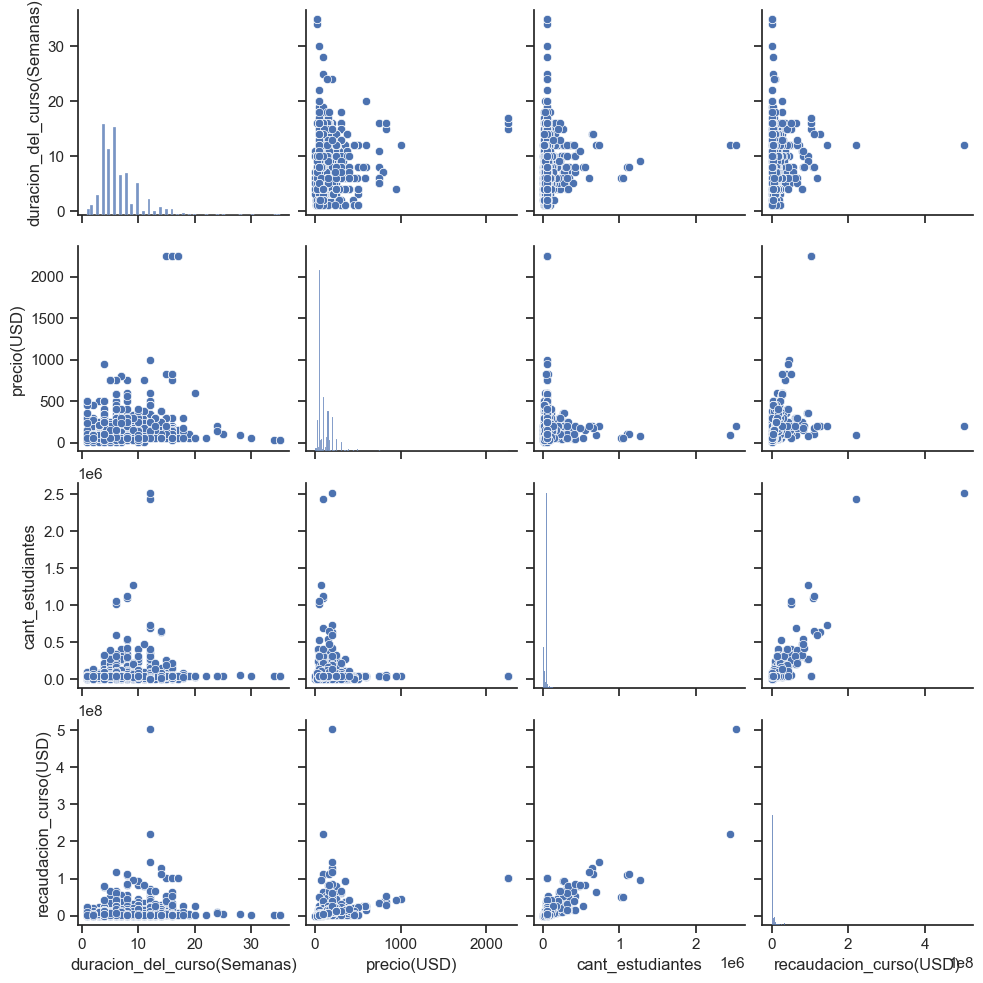

In [11]:
#Veamos graficamente la relación entre las columnas
sns.set(style="ticks")
sns.pairplot(df_edx1)
plt.show()

In [13]:
correlacion_edx = df_edx1.corr(numeric_only=True)
correlacion_edx

,duracion_del_curso(Semanas),precio(USD),cant_estudiantes,recaudacion_curso(USD)
duracion_del_curso(Semanas),1.000000,0.135967,0.103464,0.149788
precio(USD),0.135967,1.000000,0.029190,0.443783
cant_estudiantes,0.103464,0.029190,1.000000,0.817362
recaudacion_curso(USD),0.149788,0.443783,0.817362,1.000000


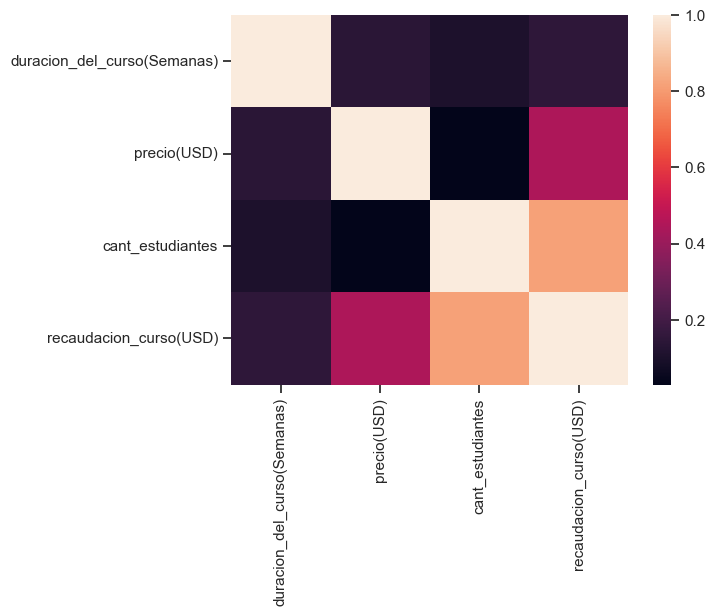

In [15]:
sns.heatmap(correlacion_edx)
plt.show()

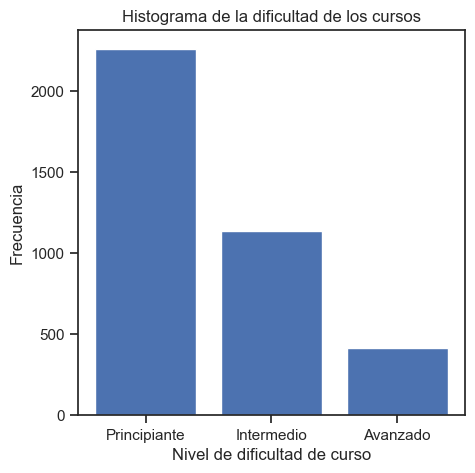

In [16]:
#Contar las ocurrencias de cada categoría en la columna
counts = df_edx1['nivel_del_curso'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xlabel('Nivel de dificultad de curso')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la dificultad de los cursos')

plt.show()

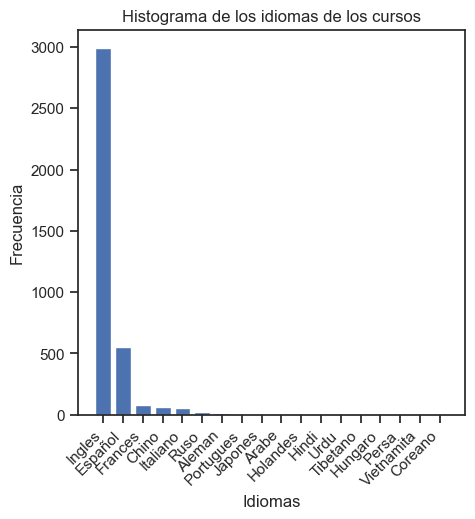

In [18]:
# Contar las ocurrencias de cada categoría en la columna
counts = df_edx1['lenguaje'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_xlabel('Idiomas')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de los idiomas de los cursos')

plt.show()

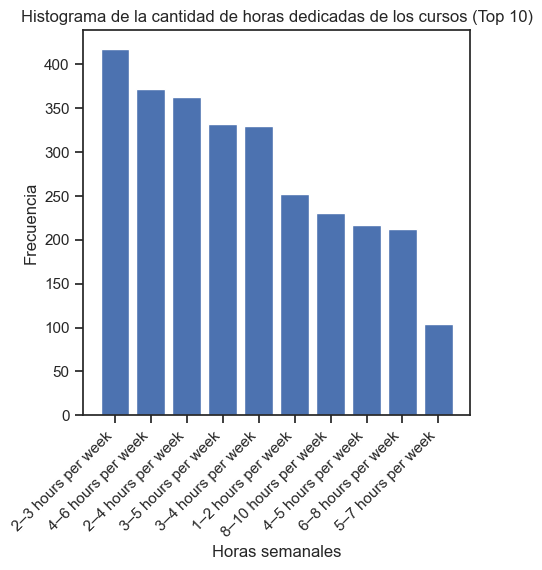

In [40]:
# Contar las ocurrencias de cada categoría en la columna 'horas_dedicadas'
counts = df_edx1['horas_dedicadas'].value_counts()

# Seleccionar solo las 10 primeras barras
top_10_counts = counts.head(10)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(top_10_counts))

ax.bar(x, top_10_counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_10_counts.index, rotation=45, ha='right')
ax.set_xlabel('Horas semanales')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la cantidad de horas dedicadas de los cursos (Top 10)')

plt.show()

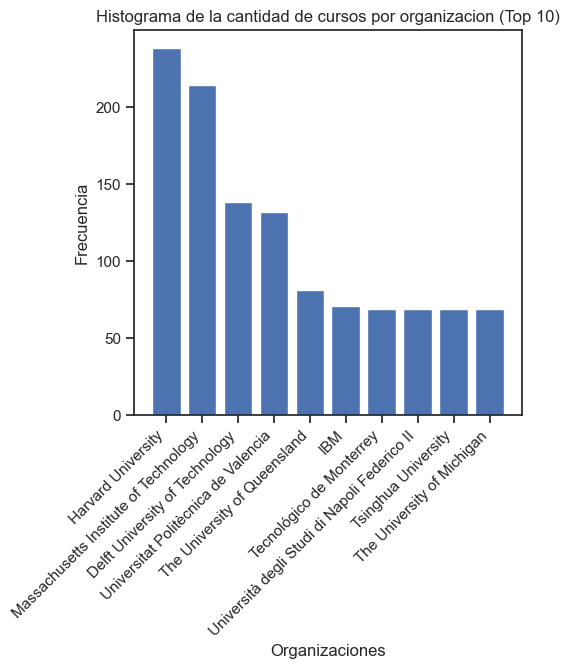

In [41]:
# Contar las ocurrencias de cada categoría en la columna 'organizacion'
counts = df_edx1['organizacion'].value_counts()

# Seleccionar solo las 10 primeras barras
top_10_counts = counts.head(10)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(top_10_counts))

ax.bar(x, top_10_counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_10_counts.index, rotation=45, ha='right')
ax.set_xlabel('Organizaciones')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la cantidad de cursos por organizacion (Top 10)')

plt.show()

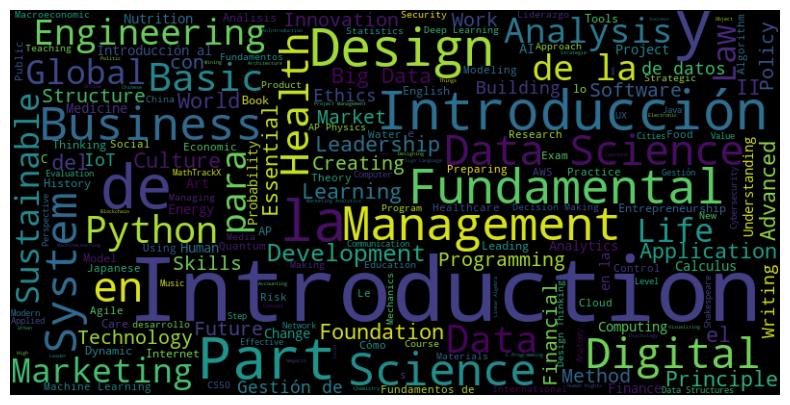

In [28]:
#Veamos que palabras son las más recurrentes en los nombres de los cursos
# Combinamos los nombres de los cursos en un solo texto
texto = ' '.join(df_edx1['nombre_curso'])

# Configuramos las stopwords (palabras a ignorar en la nube de palabras)
stopwords = set(STOPWORDS)

# Creamos una instancia de WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords)
wordcloud.generate_from_text(texto)

# Configuramos el tamaño de la figura y mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df_edx1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nombre_curso                 3816 non-null   object 
 1   nivel_del_curso              3816 non-null   object 
 2   horas_dedicadas              3816 non-null   object 
 3   duracion_del_curso(Semanas)  3816 non-null   int64  
 4   lenguaje                     3816 non-null   object 
 5   precio(USD)                  3816 non-null   float64
 6   organizacion                 3816 non-null   object 
 7   cant_estudiantes             3816 non-null   int64  
 8   recaudacion_curso(USD)       3816 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 268.4+ KB


## II. PLANTEAMOS ALGUNAS PREGUNTAS

a. ¿Cuál es el top 5 de los cursos con mayor precio por nivel de dificultad?

In [33]:
# Filtrar los cursos que tienen nivel "principiante"
df_principiante = df_edx1[df_edx1['nivel_del_curso'] == 'Principiante']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_principiante = df_principiante.sort_values('precio(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_principiante = df_top_5_principiante[['nombre_curso', 'nivel_del_curso', 'precio(USD)']]
df_top_5_principiante

,nombre_curso,nivel_del_curso,precio(USD)
3521,Yield Curve Analysis…,Principiante,949.0
3757,Corporate Finance andValuation MethodsProfessi...,Principiante,500.0
3449,Managing CustomerRelationships in theDigital E...,Principiante,499.0
1459,English Composition…,Principiante,499.0
1419,English Composition:Research and Writing…,Principiante,499.0


In [34]:
# Filtrar los cursos que tienen nivel "intermedio"
df_intermedio = df_edx1[df_edx1['nivel_del_curso'] == 'Intermedio']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_intermedio = df_intermedio.sort_values('precio(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_intermedio = df_top_5_intermedio[['nombre_curso', 'nivel_del_curso', 'precio(USD)']]
df_top_5_intermedio

,nombre_curso,nivel_del_curso,precio(USD)
3153,Decision Making inEngineering Design…,Intermedio,2250.0
3174,Reliability in EngineeringDesign…,Intermedio,2250.0
1238,Introduction to QuantumScience & Technology…,Intermedio,2250.0
1970,Deep Learning andNeural Networks forFinancial ...,Intermedio,799.0
1972,Classical MachineLearning for FinancialEnginee...,Intermedio,799.0


In [35]:
# Filtrar los cursos que tienen nivel "avanzado"
df_avanzado = df_edx1[df_edx1['nivel_del_curso'] == 'Avanzado']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_avanzado = df_avanzado.sort_values('precio(USD)', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_avanzado = df_top_5_avanzado[['nombre_curso', 'nivel_del_curso', 'precio(USD)']]
df_top_5_avanzado

,nombre_curso,nivel_del_curso,precio(USD)
1213,Quantum Detectors andSensors…,Avanzado,2250.0
1266,Solid State Devices 1…,Avanzado,2250.0
2067,Machine Learning…,Avanzado,1000.0
3142,Introduction to AnalyticsModeling…,Avanzado,825.0
1982,Computing for DataAnalysis…,Avanzado,825.0


b. ¿Cual es el top 5 de cursos de la organizacion Harvard University con mayor cantidad de estudiantes?

In [47]:
df_coursera_harvard = df_edx1[df_edx1['organizacion'] == 'Harvard University']
df_top_5_harvard = df_coursera_harvard.sort_values('cant_estudiantes', ascending=False).head(5)
df_top_5_harvard  = df_top_5_harvard[['nombre_curso', 'nivel_del_curso', 'organizacion', 'cant_estudiantes']]
df_top_5_harvard

,nombre_curso,nivel_del_curso,organizacion,cant_estudiantes
1634,CS50's Introduction toComputer Science…,Principiante,Harvard University,2522780
2,CS50's Introduction to Computer Science,Principiante,Harvard University,2442271
1632,CS50's Web Programmingwith Python andJavaScript…,Intermedio,Harvard University,727733
23,CS50's Web Programming with Python and JavaScript,Intermedio,Harvard University,698950
2877,Entrepreneurship inEmerging Economies…,Principiante,Harvard University,597683


c. ¿Cuales son los cursos que menos tiempo de duracion tienen en el nivel avanzado?

In [48]:
# Filtramos los cursos que tienen nivel "Avanzado"
df_avanzado_duracion = df_edx1[df_edx1['nivel_del_curso'] == 'Avanzado']

# Ordenemos los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_menorduracion_avanzado = df_avanzado_duracion.sort_values('duracion_del_curso(Semanas)', ascending=False).tail(3)

# Obtenemos las columnas requeridas
df_menorduracion_avanzado = df_menorduracion_avanzado[['nombre_curso', 'nivel_del_curso', 'duracion_del_curso(Semanas)']]
df_menorduracion_avanzado

,nombre_curso,nivel_del_curso,duracion_del_curso(Semanas)
3392,M&A ProfessionalCertificate Examination…,Avanzado,1
3479,Supply ChainComprehensive Exam…,Avanzado,1
3486,Risk Management inBanking and FinancialMarkets...,Avanzado,1


d. ¿Cuantos alumnos en total hay inscritos en cursos de nivel principiante, intermedio y avanzado por cada nivel?

In [51]:
# Filtrar los cursos que tienen nivel "principiante"
principiante = df_edx1[df_edx1['nivel_del_curso'] == 'Principiante']
df_cant_principiantes = principiante['cant_estudiantes'].sum()
df_cant_principiantes

116373642

In [52]:
# Filtrar los cursos que tienen nivel "intermedio"
intermedio = df_edx1[df_edx1['nivel_del_curso'] == 'Intermedio']
df_cant_intermedio = intermedio['cant_estudiantes'].sum()
df_cant_intermedio

47752498

In [53]:
# Filtrar los cursos que tienen nivel "avanzado"
avanzado = df_edx1[df_edx1['nivel_del_curso'] == 'Avanzado']
df_cant_avanzado = avanzado['cant_estudiantes'].sum()
df_cant_avanzado

16633055

e. En el caso de los cursos de nivel avanzado en su mayoria son en ingles?

In [54]:
#Veamos la cantidad de especializaciones
avanzado['lenguaje'].value_counts()

Ingles      365
Español      27
Frances      10
Chino         6
Italiano      5
Name: lenguaje, dtype: int64

Rpta: Si, la mayoria son en ingles.

f. ¿Cuál es la universidad que ofrece mayor cantidad de cursos en español?

In [61]:
df_español = df_edx1[df_edx1['lenguaje'] == 'Español']
organizacion_español = df_español.groupby('organizacion')['lenguaje'].count().reset_index()
organizacion_español.rename(columns={'lenguaje': 'cantidad_cursos_español'}, inplace=True)
organizacion_español = organizacion_español.sort_values('cantidad_cursos_español', ascending=False)
organizacion_español.head(5)

,organizacion,cantidad_cursos_español
25,Universitat Politècnica de Valencia,102
12,Pontificia Universidad Javeriana,61
15,Tecnológico de Monterrey,54
7,Inter-American Development Bank,46
19,Universidad Autónoma de Madrid,43


Rpta: La Universitat Politècnica de Valencia ofrece más cursos en español.

## III. CONCLUSIONES

- Vemos que hay una fuerte correlacion entre la recaudacion del curso y el precio.

- La mayor cantidad de cursos tienen un nivel de dificultad principiante.

- La cantidad de cursos en ingles en comparacion con los cursos en otros idiomas es muy grande, aproximadamente 3000 mil cursos en ingles.

- La mayor cantidad de cursos demanda una dedicacion de 2 o 3 horas por semana, sin embargo en conjunto podemos decir que aproximadamente el 50% del total de los cursos demandan una cantidad entre 1 a 6 horas por semana.

- La universidad de Harvard y el Instituto de tecnologia de Massachisetts son las organizaciones que mas cursos ofrecen en la plataforma de EDX.

- Los nombres de cursos con mayor cantidad de repeticiones estan relacionados a las areas de tecnologia y negocios.

- Los cursos mas costosos estan en los niveles de cursos intermedio y avanzado.

- Vemos que del top 5 de cursos con mayor cantidad de estudiantes 4 de ellos son del area de tecnologia especificamente del desarrollo web y de nivel principiante, ademas que el curso con mayor cantidad de estudiantes supera los 2,5 millones de alumnos.

- Los cursos de nivel avanzado que menor duracion tienen son del area de negocios.

- Los cursos de nivel principiante hacen un total de alumnos de aproximadamente 117 millones el cual es casi el doble de la cantidad de alumnos de nivel intermedio y avanzado juntos.

- Los cursos de nivel avanzado aunque se dan en menor cantidad la mayoria de ellos son en ingles.

- De las organizaciones que ofrecen cursos en español podemos decir que del top 4 dos son de universidades españolas y dos de universidades mexicanas.